In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tobyanderson/federalist-papers")

print("Path to dataset files:", path)

d:\stylometry_data_analysis_project\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Anantha krishna rao\.cache\kagglehub\datasets\tobyanderson\federalist-papers\versions\2


In [3]:
import os
from pathlib import Path
evidence_metadata = []
directory_path = Path('D:/stylometry_data_analysis_project/Original_Corpus')
filename=[]
for file_path in directory_path.iterdir():
    if file_path.is_file():
        filename.append(file_path.name)
for file_name_str in filename:
    if file_name_str.endswith(".txt"):
        parts = file_name_str.split("_")
        author = parts[0]
        essay_id_with_ext = parts[-1]
        essay_id = essay_id_with_ext.replace(".txt", "")
        metadata_entry = {
            'Author_Name': author,
            'Essay_ID': essay_id,
            # Reconstruct the full path using os.path.join for reading the content later
            'full_file_path': os.path.join(directory_path, file_name_str) 
        }

        evidence_metadata.append(metadata_entry)
print(evidence_metadata[:-5:-1])

[{'Author_Name': 'Madison', 'Essay_ID': '58', 'full_file_path': 'D:\\stylometry_data_analysis_project\\Original_Corpus\\Madison_fed_58.txt'}, {'Author_Name': 'Madison', 'Essay_ID': '48', 'full_file_path': 'D:\\stylometry_data_analysis_project\\Original_Corpus\\Madison_fed_48.txt'}, {'Author_Name': 'Madison', 'Essay_ID': '47', 'full_file_path': 'D:\\stylometry_data_analysis_project\\Original_Corpus\\Madison_fed_47.txt'}, {'Author_Name': 'Madison', 'Essay_ID': '46', 'full_file_path': 'D:\\stylometry_data_analysis_project\\Original_Corpus\\Madison_fed_46.txt'}]


In [4]:
for metadata in evidence_metadata:
    try:
        with open(metadata['full_file_path'],'r') as file:
            metadata["raw_data"]=file.read()
    except FileNotFoundError:
        print("not found")

In [5]:
evidence_df=pd.DataFrame(evidence_metadata)

In [6]:
evidence_df.head()

,Author_Name,Essay_ID,full_file_path,raw_data
0,dispt,49,D:\stylometry_data_analysis_project\Original_C...,Federalist No. 49&nbsp;||\n\t \nMethod of Gua...
1,dispt,50,D:\stylometry_data_analysis_project\Original_C...,Federalist No. 50&nbsp;||\n\t \nPeriodic Appe...
2,dispt,51,D:\stylometry_data_analysis_project\Original_C...,Federalist No. 51&nbsp;||\n\t \nThe Structure...
3,dispt,52,D:\stylometry_data_analysis_project\Original_C...,Federalist No. 52&nbsp;||\n\t \nThe House of ...
4,dispt,53,D:\stylometry_data_analysis_project\Original_C...,Federalist No. 53&nbsp;||\n\t \nThe Same Subj...


In [7]:
evidence_df["Author_Name"].value_counts()


Author_Name
Hamilton    54
Madison     15
dispt       11
Jay          5
Name: count, dtype: int64

In [8]:
evidence_df.dtypes

Author_Name       object
Essay_ID          object
full_file_path    object
raw_data          object
dtype: object

In [9]:
evidence_df.isnull().sum()

Author_Name       0
Essay_ID          0
full_file_path    0
raw_data          0
dtype: int64

In [10]:
import nltk
from nltk.tokenize import word_tokenize
evidence_df["token_list"] = evidence_df["raw_data"].apply(word_tokenize)

In [11]:
evidence_df["token_list"].head()

0    [Federalist, No, ., 49, &, nbsp, ;, ||, Method...
1    [Federalist, No, ., 50, &, nbsp, ;, ||, Period...
2    [Federalist, No, ., 51, &, nbsp, ;, ||, The, S...
3    [Federalist, No, ., 52, &, nbsp, ;, ||, The, H...
4    [Federalist, No, ., 53, &, nbsp, ;, ||, The, S...
Name: token_list, dtype: object

In [12]:
def clean_token(s:str):
    if not s.isalpha():
        return ""
    else:
        return s.lower()

In [13]:
cleaned_essays = []
for essay_id,tokenlist in evidence_df['token_list'].items():
    clean_and_filtered_tokens = [
        clean_token(token) 
        for token in tokenlist 
        if clean_token(token) != ""
    ]
    cleaned_essays.append(clean_and_filtered_tokens)

evidence_df['Clean_Tokens'] = cleaned_essays

evidence_df[['Author_Name', 'Clean_Tokens']].head()

,Author_Name,Clean_Tokens
0,dispt,"[federalist, no, nbsp, method, of, guarding, a..."
1,dispt,"[federalist, no, nbsp, periodic, appeals, to, ..."
2,dispt,"[federalist, no, nbsp, the, structure, of, the..."
3,dispt,"[federalist, no, nbsp, the, house, of, represe..."
4,dispt,"[federalist, no, nbsp, the, same, subject, con..."


In [14]:
evidence_df["joined_tokens"] = [" ".join(tokenlist) for essay_id,tokenlist in evidence_df['Clean_Tokens'].items() ]

In [15]:
evidence_df["joined_tokens"].head()

0    federalist no nbsp method of guarding against ...
1    federalist no nbsp periodic appeals to the peo...
2    federalist no nbsp the structure of the govern...
3    federalist no nbsp the house of representative...
4    federalist no nbsp the same subject continued ...
Name: joined_tokens, dtype: object

In [16]:
from sklearn.feature_extraction.text import CountVectorizer


In [17]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
print(stopwords)


{'most', "he's", 'myself', 'there', 'mightn', "you'll", 'both', 't', 'below', "they'd", 'why', 'isn', "we're", 'while', 'ours', 'and', 'itself', "hasn't", 'than', 'because', 'nor', 'by', 'theirs', 'am', "we've", 'those', 'wasn', 'him', 'our', 'have', 'was', 'i', 'too', 'mustn', "you'd", 'can', "shan't", "we'd", 'when', 'for', "that'll", 'themselves', 'up', 'you', "we'll", 'your', "isn't", 'under', 'a', 'yours', 'an', 'in', "hadn't", 'or', 'other', "it'll", "they're", "he'd", 'more', 'not', "i've", 'aren', 'then', 'this', 'any', 'weren', "you've", "couldn't", 'such', 'be', "aren't", 'between', 'it', 'her', "needn't", 'further', 'should', 'now', 'some', 'shan', 'did', 'above', 'at', 'his', 'll', 'been', 've', 'its', 'before', 'these', 'being', "wouldn't", "you're", 'once', "wasn't", 'wouldn', 'couldn', "she'd", 'again', "haven't", 'ourselves', "shouldn't", 'having', "they've", 'here', 'into', 'on', "i'd", 'to', 'very', 'y', 'my', 'their', "didn't", 'about', 'same', 'doing', 'from', 'your

In [18]:
vectorizer=CountVectorizer(vocabulary=stopwords)
X=vectorizer.fit_transform(evidence_df['joined_tokens'].values)

In [19]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6964 stored elements and shape (85, 198)>

In [20]:
evidence_df.head()

,Author_Name,Essay_ID,full_file_path,raw_data,token_list,Clean_Tokens,joined_tokens
0,dispt,49,D:\stylometry_data_analysis_project\Original_C...,Federalist No. 49&nbsp;||\n\t \nMethod of Gua...,"[Federalist, No, ., 49, &, nbsp, ;, ||, Method...","[federalist, no, nbsp, method, of, guarding, a...",federalist no nbsp method of guarding against ...
1,dispt,50,D:\stylometry_data_analysis_project\Original_C...,Federalist No. 50&nbsp;||\n\t \nPeriodic Appe...,"[Federalist, No, ., 50, &, nbsp, ;, ||, Period...","[federalist, no, nbsp, periodic, appeals, to, ...",federalist no nbsp periodic appeals to the peo...
2,dispt,51,D:\stylometry_data_analysis_project\Original_C...,Federalist No. 51&nbsp;||\n\t \nThe Structure...,"[Federalist, No, ., 51, &, nbsp, ;, ||, The, S...","[federalist, no, nbsp, the, structure, of, the...",federalist no nbsp the structure of the govern...
3,dispt,52,D:\stylometry_data_analysis_project\Original_C...,Federalist No. 52&nbsp;||\n\t \nThe House of ...,"[Federalist, No, ., 52, &, nbsp, ;, ||, The, H...","[federalist, no, nbsp, the, house, of, represe...",federalist no nbsp the house of representative...
4,dispt,53,D:\stylometry_data_analysis_project\Original_C...,Federalist No. 53&nbsp;||\n\t \nThe Same Subj...,"[Federalist, No, ., 53, &, nbsp, ;, ||, The, S...","[federalist, no, nbsp, the, same, subject, con...",federalist no nbsp the same subject continued ...


In [21]:
mask=evidence_df["Author_Name"] == "dispt"
df_disputed=evidence_df[mask]

In [22]:
df_disputed.columns

Index(['Author_Name', 'Essay_ID', 'full_file_path', 'raw_data', 'token_list',
       'Clean_Tokens', 'joined_tokens'],
      dtype='object')

In [23]:
df_disputed.drop(columns=['full_file_path', 'raw_data', 'token_list',
       'Clean_Tokens', 'joined_tokens'],inplace=True)

C:\Users\Anantha krishna rao\AppData\Local\Temp\ipykernel_21532\1602518812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disputed.drop(columns=['full_file_path', 'raw_data', 'token_list',


In [24]:
df_disputed

,Author_Name,Essay_ID
0,dispt,49
1,dispt,50
2,dispt,51
3,dispt,52
4,dispt,53
5,dispt,54
6,dispt,55
7,dispt,56
8,dispt,57
9,dispt,62


In [25]:
mask1=evidence_df["Author_Name"] != "dispt"
df_known = evidence_df[mask1]

In [26]:
df_known.drop(columns=['full_file_path', 'raw_data', 'token_list',
       'Clean_Tokens', 'joined_tokens'],inplace=True)

C:\Users\Anantha krishna rao\AppData\Local\Temp\ipykernel_21532\2395977719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_known.drop(columns=['full_file_path', 'raw_data', 'token_list',


In [27]:
y_known=df_known["Author_Name"]

In [28]:
X_disputed_index=df_disputed.index
X_Known_index=df_known.index

In [29]:
disputed_index_list=X_disputed_index.tolist()
known_index_list=X_Known_index.tolist()

In [30]:
X_disputed=X[disputed_index_list,:]
X_disputed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 884 stored elements and shape (11, 198)>

In [31]:
X_known = X[known_index_list,:]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_known,y_known,test_size=0.2,random_state=45)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [34]:
X_pca = pca.fit_transform(X_known)


In [35]:
y_known.reset_index(drop=True,inplace=True)

In [36]:
PCA_df=pd.DataFrame(X_pca,columns=["PCA1","PCA2"])
PCA_df

,PCA1,PCA2
0,-1.031917,63.946590
1,-25.942286,42.015928
2,-112.505633,18.727156
3,-96.720528,-13.426827
4,2.006146,-19.173658
...,...,...
69,39.151456,59.385911
70,80.129048,52.140464
71,111.380731,69.888354
72,-65.598128,6.300850


In [37]:
y_known

0     Hamilton
1     Hamilton
2     Hamilton
3     Hamilton
4     Hamilton
        ...   
69     Madison
70     Madison
71     Madison
72     Madison
73     Madison
Name: Author_Name, Length: 74, dtype: object

In [38]:
PCA_df["Y"]=y_known
PCA_df.tail()


,PCA1,PCA2,Y
69,39.151456,59.385911,Madison
70,80.129048,52.140464,Madison
71,111.380731,69.888354,Madison
72,-65.598128,6.300850,Madison
73,-17.162909,14.755036,Madison


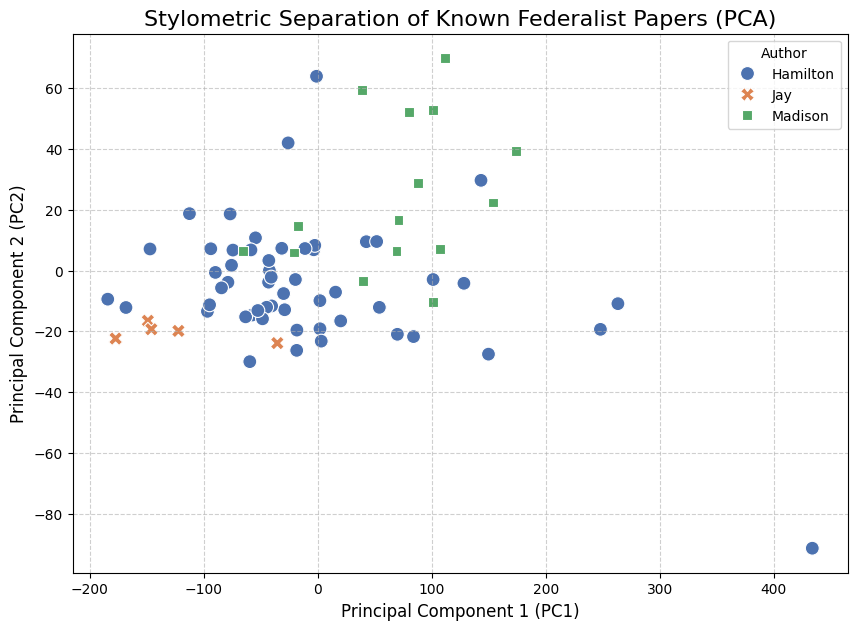

In [39]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue="Y",
    data=PCA_df,
    style='Y',
    s=100,
    palette='deep'
)
plt.title('Stylometric Separation of Known Federalist Papers (PCA)', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title='Author', loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('pca_stylometric_separation.png')

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer=TfidfVectorizer(vocabulary=stopwords)
X1=tfidfvectorizer.fit_transform(evidence_df['joined_tokens'].values)

In [41]:
X1_disputed=X1[disputed_index_list,:]
X1_known = X1[known_index_list,:]

In [42]:
X1_pca = pca.fit_transform(X1_known)

In [43]:
PCA_df1=pd.DataFrame(X1_pca,columns=["PCA1","PCA2"])
PCA_df1

,PCA1,PCA2
0,-0.035229,-0.241005
1,-0.003024,-0.200468
2,0.029445,-0.174806
3,0.037359,0.092325
4,0.055645,0.033779
...,...,...
69,-0.103684,-0.102717
70,-0.054534,-0.072755
71,-0.094139,-0.170264
72,0.001308,-0.066661


In [44]:
PCA_df1["Y"]=y_known
PCA_df1.tail()

,PCA1,PCA2,Y
69,-0.103684,-0.102717,Madison
70,-0.054534,-0.072755,Madison
71,-0.094139,-0.170264,Madison
72,0.001308,-0.066661,Madison
73,-0.056679,-0.018335,Madison


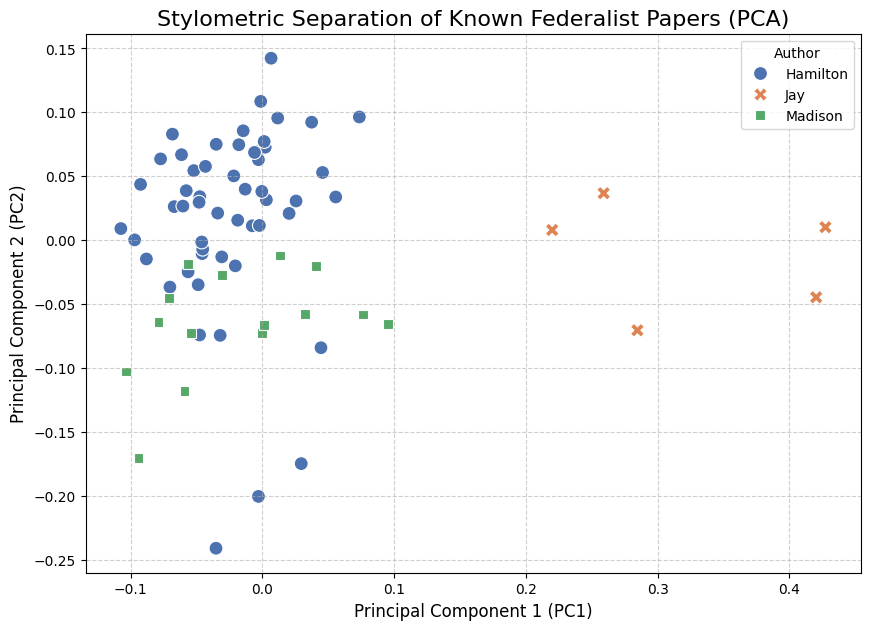

In [45]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue="Y",
    data=PCA_df1,
    style='Y',
    s=100,
    palette='deep'
)
plt.title('Stylometric Separation of Known Federalist Papers (PCA)', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title='Author', loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('pca_stylometric_separation_usingtfidf.png')

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X1_known,y_known,test_size=0.2,random_state=45)

In [47]:
from sklearn.svm import SVC
model=SVC(kernel='rbf',probability=False)

In [48]:
model.fit(X_train,Y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [49]:
y_pred =  model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(Y_test,y_pred=y_pred)

In [51]:
accuracy

0.8666666666666667

In [52]:
confusion_matrix(y_pred=y_pred,y_true=Y_test)

array([[13,  0],
       [ 2,  0]])

In [53]:
y_disputed = model.predict(X1_disputed)

In [55]:
final_df=pd.DataFrame(df_disputed["Essay_ID"])

In [56]:
final_df["final_predictions"] = y_disputed

In [57]:
final_df.head()

,Essay_ID,final_predictions
0,49,Hamilton
1,50,Hamilton
2,51,Hamilton
3,52,Hamilton
4,53,Hamilton
